In [10]:
import torch 
import numpy as np


In [34]:
class RegressionModel:
    def __init__(self,x,y):
        self.w = torch.rand([1],requires_grad=True)
        self.x = x
        self.y = y
        self.gradients  = {i:[] for i in ["w","b"]}
        self.b = torch.rand([1],requires_grad=True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self,lr):
        self.w -= lr*self.w.grad
        self.b -= lr*self.b.grad
        self.gradients["w"].append(self.w.grad.clone())
        self.gradients['b'].append(self.b.bgrad.clone())
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    def train(self,lr,epochs):
        # Batch training
        total_loss = []
        for epochs in range(epochs):
            loss = 0
            for j in range(len(self.x)):
                predicted = self.forward(self.x[j])
                loss+=(self.y[j]-predicted)**2
            loss = loss/len(self.x)
            total_loss.append(loss.item())
            loss.backward()
            with torch.no_grad():
                self.update(lr)
            self.reset_grad()
            # print(f"LOSS : {loss}")




In [32]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])
model = RegressionModel(x,y)
model.train(0.0001,1000)

LOSS : tensor([5.7914], grad_fn=<DivBackward0>)
LOSS : tensor([5.0938], grad_fn=<DivBackward0>)
LOSS : tensor([4.4803], grad_fn=<DivBackward0>)
LOSS : tensor([3.9410], grad_fn=<DivBackward0>)
LOSS : tensor([3.4667], grad_fn=<DivBackward0>)
LOSS : tensor([3.0498], grad_fn=<DivBackward0>)
LOSS : tensor([2.6832], grad_fn=<DivBackward0>)
LOSS : tensor([2.3608], grad_fn=<DivBackward0>)
LOSS : tensor([2.0774], grad_fn=<DivBackward0>)
LOSS : tensor([1.8282], grad_fn=<DivBackward0>)
LOSS : tensor([1.6091], grad_fn=<DivBackward0>)
LOSS : tensor([1.4164], grad_fn=<DivBackward0>)
LOSS : tensor([1.2471], grad_fn=<DivBackward0>)
LOSS : tensor([1.0981], grad_fn=<DivBackward0>)
LOSS : tensor([0.9672], grad_fn=<DivBackward0>)
LOSS : tensor([0.8520], grad_fn=<DivBackward0>)
LOSS : tensor([0.7508], grad_fn=<DivBackward0>)
LOSS : tensor([0.6618], grad_fn=<DivBackward0>)
LOSS : tensor([0.5835], grad_fn=<DivBackward0>)
LOSS : tensor([0.5147], grad_fn=<DivBackward0>)
LOSS : tensor([0.4542], grad_fn=<DivBack

In [35]:
x = torch.tensor([2,4])
y = torch.tensor([20,40])

model = RegressionModel(x,y)
model.train(0.0001,200)
model.gradients['w'][:2]

[tensor([-190.1251]), tensor([-189.7107])]

In [95]:
class RegressionModel:
    def __init__(self, x, y):
        self.w = torch.rand([1],requires_grad=True)
        self.x = x
        self.y = y
        self.gradients  = {i:[] for i in ["w","b"]}
        self.b = torch.rand([1],requires_grad=True)
    def forward(self, x):
        return x * self.w + self.b
    def update(self,lr):
        self.w -= lr*self.w.grad
        self.b -= lr*self.b.grad
        self.gradients['w'].append(self.w.grad.clone())
        self.gradients['b'].append(self.b.grad.clone())
    def train(self, lr, epochs):
        self.total_loss = []
        for i in range(epochs):
            loss = 0
            for j in range(len(self.x)):
                y_pred = self.forward(self.x[j])
                loss += (self.y[j]-y_pred)**2
            loss = loss/len(self.x)
            self.total_loss.append(loss.detach().numpy().item())
            loss.backward()
            with torch.no_grad():
                self.update(lr)
            self.w.grad.zero_()
            self.b.grad.zero_()
            print(f"epoch {i+1}  LOSS : {loss.item()}")


epoch 1  LOSS : 25891.20703125
epoch 2  LOSS : 11177.158203125
epoch 3  LOSS : 4984.3369140625
epoch 4  LOSS : 2377.911376953125
epoch 5  LOSS : 1280.91845703125
epoch 6  LOSS : 819.2110595703125
epoch 7  LOSS : 624.8818359375
epoch 8  LOSS : 543.0858154296875
epoch 9  LOSS : 508.652587890625
epoch 10  LOSS : 494.15289306640625
epoch 11  LOSS : 488.04327392578125
epoch 12  LOSS : 485.4647521972656
epoch 13  LOSS : 484.372314453125
epoch 14  LOSS : 483.90533447265625
epoch 15  LOSS : 483.7017517089844
epoch 16  LOSS : 483.60882568359375
epoch 17  LOSS : 483.56268310546875
epoch 18  LOSS : 483.53594970703125
epoch 19  LOSS : 483.517333984375
epoch 20  LOSS : 483.50250244140625
epoch 21  LOSS : 483.48895263671875
epoch 22  LOSS : 483.47625732421875
epoch 23  LOSS : 483.463623046875
epoch 24  LOSS : 483.4513244628906
epoch 25  LOSS : 483.4388732910156
epoch 26  LOSS : 483.4266052246094
epoch 27  LOSS : 483.4141540527344
epoch 28  LOSS : 483.4019470214844
epoch 29  LOSS : 483.3895568847656


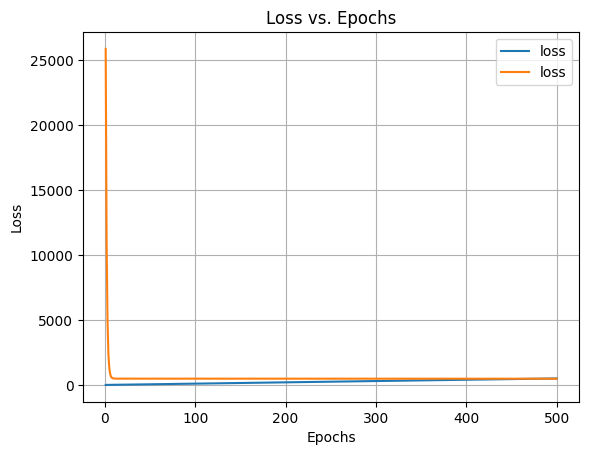

In [99]:
import matplotlib.pyplot as plt
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)
model = RegressionModel(x,y)
model.train(learning_rate,500)
# print(model.total_loss)
print(model.total_loss)
plt.plot(range(1,501),model.total_loss,label = "loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()



In [102]:
import torch.nn as nn

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
    def forward(self,x):
        return x*self.w+self.b

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1,1)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1,1)
lr = 0.001
model = RegressionModel()
loss_fuc  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
total_loss = []
epochs = 200
for epoch in range(epochs):
    outputs = model(x)
    loss = loss_fuc(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    # Print every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')




Epoch [10/200], Loss: 492.5326
Epoch [20/200], Loss: 480.6849
Epoch [30/200], Loss: 480.5797
Epoch [40/200], Loss: 480.4766
Epoch [50/200], Loss: 480.3747
Epoch [60/200], Loss: 480.2734
Epoch [70/200], Loss: 480.1724
Epoch [80/200], Loss: 480.0722
Epoch [90/200], Loss: 479.9730
Epoch [100/200], Loss: 479.8745
Epoch [110/200], Loss: 479.7765
Epoch [120/200], Loss: 479.6792
Epoch [130/200], Loss: 479.5829
Epoch [140/200], Loss: 479.4867
Epoch [150/200], Loss: 479.3917
Epoch [160/200], Loss: 479.2969
Epoch [170/200], Loss: 479.2032
Epoch [180/200], Loss: 479.1099
Epoch [190/200], Loss: 479.0176
Epoch [200/200], Loss: 478.9257


Epoch [10/200], Loss: 494.7270
Epoch [20/200], Loss: 482.7798
Epoch [30/200], Loss: 482.6595
Epoch [40/200], Loss: 482.5422
Epoch [50/200], Loss: 482.4258
Epoch [60/200], Loss: 482.3099
Epoch [70/200], Loss: 482.1947
Epoch [80/200], Loss: 482.0807
Epoch [90/200], Loss: 481.9676
Epoch [100/200], Loss: 481.8547
Epoch [110/200], Loss: 481.7429
Epoch [120/200], Loss: 481.6323
Epoch [130/200], Loss: 481.5219
Epoch [140/200], Loss: 481.4124
Epoch [150/200], Loss: 481.3039
Epoch [160/200], Loss: 481.1960
Epoch [170/200], Loss: 481.0886
Epoch [180/200], Loss: 480.9824
Epoch [190/200], Loss: 480.8768
Epoch [200/200], Loss: 480.7716


/tmp/ipykernel_5612/506743333.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


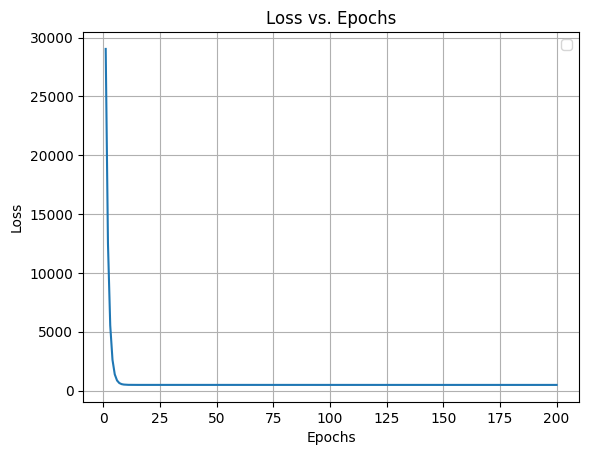

In [104]:
import torch.nn as nn
import matplotlib.pyplot as plt

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        return self.linear(x)

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1,1)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1,1)
lr = 0.001
model = RegressionModel()
loss_fuc  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
total_loss = []
epochs = 200
for epoch in range(epochs):
    outputs = model(x)
    loss = loss_fuc(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    # Print every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1,epochs+1),total_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()


tensor([[3., 4.],
        [5., 6.],
        [2., 8.],
        [5., 7.],
        [3., 1.]])
Epoch [10/2000], Loss: 22.6313
Epoch [20/2000], Loss: 22.2541
Epoch [30/2000], Loss: 21.9383
Epoch [40/2000], Loss: 21.6555
Epoch [50/2000], Loss: 21.3992
Epoch [60/2000], Loss: 21.1665
Epoch [70/2000], Loss: 20.9552
Epoch [80/2000], Loss: 20.7632
Epoch [90/2000], Loss: 20.5887
Epoch [100/2000], Loss: 20.4300
Epoch [110/2000], Loss: 20.2857
Epoch [120/2000], Loss: 20.1545
Epoch [130/2000], Loss: 20.0350
Epoch [140/2000], Loss: 19.9262
Epoch [150/2000], Loss: 19.8271
Epoch [160/2000], Loss: 19.7368
Epoch [170/2000], Loss: 19.6545
Epoch [180/2000], Loss: 19.5793
Epoch [190/2000], Loss: 19.5107
Epoch [200/2000], Loss: 19.4480
Epoch [210/2000], Loss: 19.3907
Epoch [220/2000], Loss: 19.3383
Epoch [230/2000], Loss: 19.2902
Epoch [240/2000], Loss: 19.2462
Epoch [250/2000], Loss: 19.2058
Epoch [260/2000], Loss: 19.1687
Epoch [270/2000], Loss: 19.1345
Epoch [280/2000], Loss: 19.1031
Epoch [290/2000], Loss

/tmp/ipykernel_12433/1671879050.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


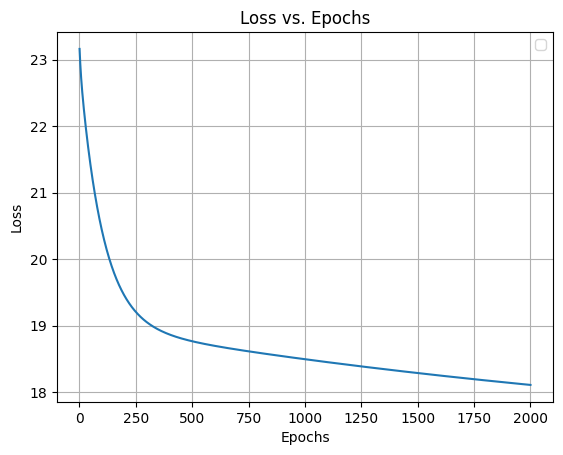

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
    def forward(self,x):
        return self.linear(x)

x = torch.tensor([[3.0, 4.0, 5.0, 6.0, 2.0],[8,5,7,3,1]])
x=torch.reshape(x,[5,2])
print(x)
y = torch.tensor([-3.7,3.5,2.5,11.5,5.7]).view(-1,1)
lr = 0.001
model = RegressionModel()
loss_fuc  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
total_loss = []
epochs = 2000
for epoch in range(epochs):
    outputs = model(x)
    loss = loss_fuc(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    # Print every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1,epochs+1),total_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def sigmoid(self,x):
        return 1/(1+torch.exp(-x))
    def forward(self,x):
        return self.linear(self.sigmoid(x))
x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]
x = torch.tensor(x).view(-1,1).float()
y = torch.tensor(y).view(-1,1).float()
lr = 0.001
model = RegressionModel()
loss_fuc  = nn.BCEWithLogitsLoss
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
total_loss = []
epochs = 2000
for epoch in range(epochs):
    outputs = model(x)
    loss = loss_fuc(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    # Print every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1,epochs+1),total_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.legend()
plt.show()


AttributeError: 'list' object has no attribute 'float'